In [16]:
%load_ext autoreload
%autoreload 2
from utils import *
from numpy import median
from scipy.stats import median_test, f_oneway
palette = sns.color_palette()
sns.set(rc={'figure.figsize':(8, 5)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The Effects of Working Memory on Program Tracing

In this series of experiments, my goal is to understand how working memory affects our ability to mentally trace through a simple program. We are going to analyze the language of *arithmetic programs*, i.e. those containing numbers, binary operators, variables with assignment, and functions. Here's an example program demonstrating the full range of language features.

In [17]:
def f(x):
    y = x + 1
    return y + x

def g(z, q):
    return f(z - q)

g(1, 4)

-5

We will focus on the task of mentally computing the output of the function without use of external aids (pen/paper, calculator, etc.) except for the program listing. To focus on working memory, all arithmetic will be addition and subtraction, with all literals in the range 1-9.  The goal is to identify kinds of programs that stress working memory, and to understand the size of the effect on accuracy, response time, and other measures.

# 1. Variables

When tracing an arithmetic program, I hypothesize there are two main kinds of working memory load:
1. Things to remember: any kind of program state that needs to be tracked, e.g. variables and their values, and the order of functions on a call stack.
2. Interference: mental operations that induce forgetting of things to remember, e.g. searching for a function may cause one to forget variables in working memory

The simplest kind of program state in our programming model are variables. In the worst case, a person theoretically needs to remember three things about a variable:
* The name (e.g. `x`)
* The value (e.g. `1`)
* The association between the two (e.g. `x = 1`)

In this way, variables represent a form of _paired-associate_ learning. When used in the context of program tracing, e.g. `x = 1; y = x + 1`, a variable lookup ("what is the value of `x`?") is a form of _cued recall_.

A basic first question: if a person does nothing but just remember variables, how many can they remember? Assuming the standard model that working memory has 4±1 chunks, we would assume a person can remember about 4 variables/value pairs if they are chunked together.

## 1.1 Experiment 1: Variable free recall

To test this hypothesis, I first did a free recall experiment. The participant was shown $N_{var}$ variable/value bindings (e.g. `x = 1; y = 8; ...`), where each variable was randomly chozen from A to Z, and each value is 1 to 9. After being presented these bindings for $1.5*N_{var}$ seconds, then the participant was prompted to immediately recall as many pairs as they could in any order. The experiment was run for 10 trials per value of $N_{var}$. Below, I plot the number of correctly remembered pairs per trial at each $N_{var}$. Each dot represents a single trial.

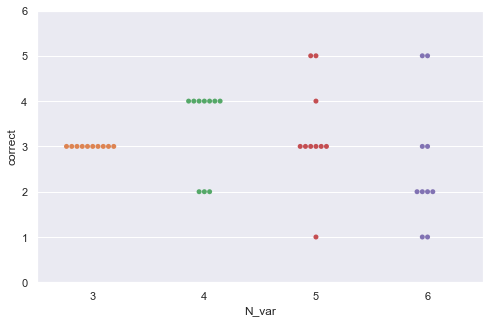

In [18]:
exp1 = VariableSpanExperiment()
ax = sns.swarmplot(data=exp1.results(), x='N_var', y='correct', palette=palette[1:])
_ = ax.set_yticks(list(range(0, 7)))

Consistent with the hypothesis, the participant could only remember about 4 variables perfectly. Trying to remember more than 4 variables causes worse performance than doing 4 or 3. This decrease in performance could potentially be explained by interference: in trying to remember so many bindings, each binding individually was less likely to be maintained.

## 1.2 Experiment 2: Variable cued recall

To confirm these findings in a slightly more realistic setting, I did the same experiment, except instead of asking for all $N_{var}$ variables and values, I provided two randomly selected variable names as prompts. The participant then input the corresponding values for those variables. 

From the prior experiment, we would predict e.g. that for $N_{var} = 6$, the participant can remember on average 2 to 3 bindings. Given 2 randomly selected variables, the probability of knowing at least one is $1 - \left(\frac{6-2.5}{6}\right)^2 = 0.65$.

The mean number of variables remembered per trial is shown below:

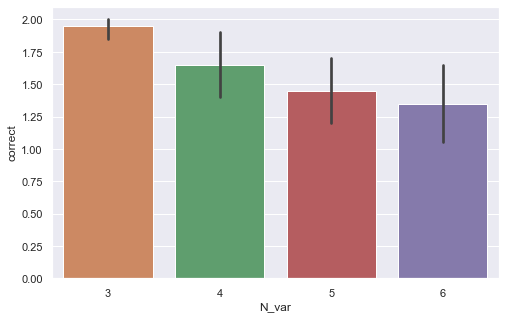

In [19]:
exp2 = VariableCuedRecallExperiment()
_ = sns.barplot(data=exp2.results(), x='N_var', y='correct', palette=palette[1:])

This data appears to be consistent with the prior, despite the slight change in task. Use of cues vs. free recall did not significantly affect accuracy.

## 1.3 Experiment 3: Variable with single arithmetic expression

Next, we consider how mental operations can interfere with variable bindings in working memory. Like before, we use the same experimental setup of showing $N_{var}$ variable bindings to the participant. Then the variables are removed, and a new screen is shown with a randomly generated arithmetic expression, e.g.

```python
y - z + x
```

The particpant is then prompted for the numeric answer with no time limit.

We assume the participant produces a correct response if they correctly remember all $N_{var}$ variables. Under the null hypothesis that the arithmetic introduces no interference, the mean correct number of trials should match the mean number of trials with all $N_{var}$ variables remembered in experiment 1. Results are shown below (note the axis shift, N ranges 2 to 5 here).

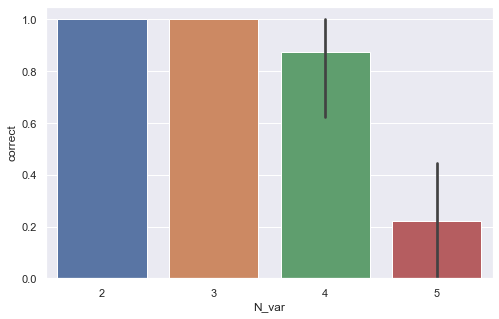

In [20]:
exp3 = VariableArithmeticExperiment()
_ = sns.barplot(data=exp3.results(), x='N_var', y='correct', palette=palette)

Consistent with the null hypothesis, the mean correctness is about the same as experiment 1 (e.g. ~70% at N=4 in E1 vs. ~80% at N=4 in E3). This suggests that a single arithmetic operation does not introduce substantial interference in variable bindings within working memory.

## 1.4 Experiment 4: Multi-stage variable/arithmetic procedures

A more realistic kind of program is one that interleaves variable assignment and computation, i.e. a multi-stage procedure with intermediates that need to be remembered for later stages. Specifically, we consider performing an arithmetic operation before each variable binding. The key question is: does this produce noticeable interference, i.e. reduce working memory capacity beyond the pure-memorization limit?

For this experiment, in each trial, the participant follows a randomly generated series of arithmetic statements of the form `var = left binop right`. The 0-th stage is always a constant assignment `var = constant`. Following this, the operands are randomly assigned to be either a random prior variable or a constant. 

The participant is shown one stage at a time. At each stage, the participant is prompted to input the value of the variable, e.g. if `x = 3 + y` is shown and previously `y = 4`, then the participant should enter `7`. After entering a value, if it is correct, the next stage is shown after 1sec. If it is incorrect, the trial is over, and the participant goes to the next trial.

At stage $i$, the participant has seen $i-1$ variables bindings. As with the cued recall experiment, on a given stage, the participant needs to recall up to 2 values when prompted with the corresponding variables. To make a prediction for this experiment, let's look at the fraction of trials where both variables were perfectly remembered in cued recall:

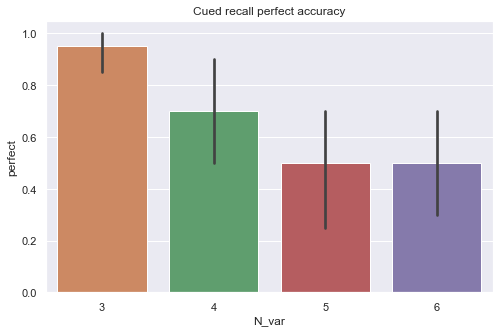

In [21]:
df = exp2.results()
df['perfect'] = df['correct'] == 2
ax = sns.barplot(data=df, x='N_var', y='perfect', palette=palette[1:])
_ = ax.set_title('Cued recall perfect accuracy')

Given this data, under the null hypothesis of zero interference from arithmetic, we would expect that <10% of the mistakes occur at stage 4, ~30% of the mistakes occur at stage 5, and most of the remaining mistakes occur at stage 6.

To test this prediction, we ran the multi-stage experiment for 20 trials. The histogram and cumulative distribution of mistakes by stage are shown below:

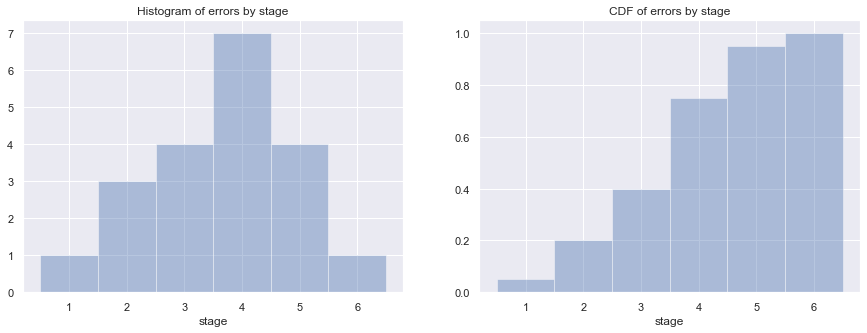

In [22]:
exp4 = VariableSequenceExperiment()
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# PDF
ax1.set_title('Histogram of errors by stage')
bins = np.arange(0.5, 7.5)
sns.distplot(ax=ax1, a=exp4.results().stage, kde=False, bins=bins)

# CDF 
ax2.set_title('CDF of errors by stage')
kwargs = {'cumulative': True}
sns.distplot(ax=ax2, a=exp4.results().stage, kde=False, norm_hist=True, hist_kws=kwargs, bins=bins)

Contrary to the null hypothesis, these results suggest that the vast majority of mistakes (~90%) are made before stage 6. From this, we conclude that the participant is performing worse than purely memorizing some number of variable bindings.

There are two potential explanations:

1. Interference from arithmetic: doing repeated computation in between memory I/O causes forgetting because computation involves memory resources that compete with storage for variables.
2. Decay over time: doing computation in between memory I/O causes reads to become more spaced out in time from the writes. 

## 1.5 Summary of variable experiments

Here's a brief summary of conclusions from the experiments above.

1. Given unrelated variable/value pairs, the participant could only remember about 4 of them at a time. This effect was consistent across free and cued recall.
2. A single arithmetic operation involving remembered variables did not produce memory interference. Multiple interleaved arithmetic operations did produce substantial interference.

# 2. Function calls

Next, we consider the cognitive load of function calls on working memory. Consider, for instance, these two equivalent programs:

Program 1:
```python
x = 1 
y = x - 4
z = y - x
```

Program 2:
```python
def h(a, b):
    return b - a
def q():
    return 1
def r(f):
    return f - 4

x = q()
y = r(x)
z = h(x, y)
```

The main question of inquiry: is the second program cognitively harder to trace, and if so, in what ways? There are a number of possible effects to consider:

1. **More syntax**: functions provide more characters to read/parse, which induces low-level comprehension overhead.<br /><br />
2. **Matching names to functions**: the person tracing must either memorize the name and body of a function (unlikely, in my experience) or lookup the function on-demand when it's called. This requires a search process (e.g. given a call `r(x)`, where is the definition of `r`?) which could interfere with working memory. This search could be harder depending on the source order of the function definitions relative to their usage.<br /><br />
3. **Matching call-site arguments to definition-site arguments**: in `h(x, y)`, the tracer needs to recognize/remember the association `a = x` and `b = y`. This could involve a careful perception process (matching the i-th call arg to i-th def arg as needed) or a memory process (adding K variable bindings to memory). This matching could be harder depending on the variable names (e.g. `def h(x, y)` would hypothetically be easier) and the order of variables (e.g. if order is `def h(a, b)`, is it easier when variables are used in definition order like `a - b` or out-of-order like `b - a`?)

## 2.1 Experiment 5: Straight-line code vs. function calls

To evaluate the three effects mentioned, we can start by comparing code with functions to code without functions. Specifically, the experiment here is as follows. For a given number of variables $N_{var}$, generate a program of this form:

```
var1 = C1
var2 = var1 binop C2
var3 = var(1|2) binop var(1|2)
...
```

Let's consider the example at the beginning of the section.

```python
x = 1 
y = x - 4
z = y - x
```

We will consider four conditions for presenting this program. First, no-functions, exactly as presented. Only variables.

Second, simple functions. Here, the order of the function definitions is the same as order of use. The names of the function arguments are the same as the names of the call-site variables. The function arguments are declared in their order of usage within the function.

```python
def f():
    return 1
def q(x):
    return x - 4
def w(y, x):
    return y - x

x = f()
y = q(x)
z = w(y, x)
```

This condition should introduce just effects (1) and (2), adding more syntax and requiring search for functions. Because the variables and parameters are identically named, aligning arguments should not be an issue.

The next condition randomly renames the function arguments, introducing the cognitive load of alignment (effect 3). For example:

```python
def f():
    return 1
def q(a):
    return a - 4
def w(u, r):
    return u - r

x = f()
y = q(x)
z = w(y, x)
```

The final condition reorders the function arguments with respect to their usage. For example, `def w(r, u)` instead of `def w(u, r)` in the previous program. This hypothetically increases the cognitive load of searching for a function call.

More like a traditional comprehension setting, we do not impose any arbitrary memory restrictions (e.g. memorize these variables before continuing). Rather, the participant is presented the entire program and asked to trace its final value. We then evaluate the response time and accuracy of the response.

We hypothesize that the four conditions should have increasing difficulty in the order presented, corresponding to increased response times.


For $N_{var} = 2, 3, 4$, the experiment was run for 10 trials per condition, 120 in total. The response times and accuracy are shown below:

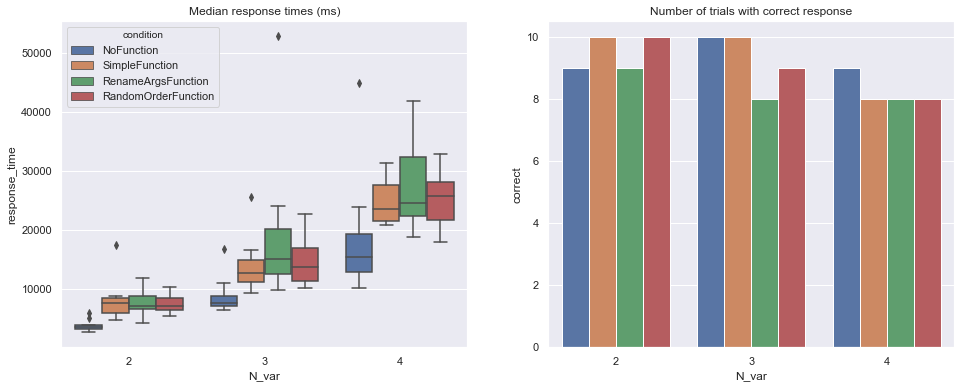

In [23]:
exp5 = FunctionBasicExperiment()

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(
    ax=ax1, data=exp5.results(), x='N_var', y='response_time', hue='condition',
    #estimator=median,
    hue_order=[str(c).split('.')[1] for c in exp5.Condition])
ax1.set_title('Median response times (ms)')

sns.barplot(
    ax=ax2, data=exp5.results().groupby(['N_var', 'condition']).sum().reset_index(), 
    x='N_var', y='correct', hue='condition',
    hue_order=[str(c).split('.')[1] for c in exp5.Condition])
ax2.get_legend().remove()
_ = ax2.set_title('Number of trials with correct response')

The three with-function conditions do not have a noticeable difference in response time or correctness. The only reliable trend was that the condition without functions had a a median about ~50% that of the other conditions. Below is a table of the median of the SimpleFunction condition divided by the median of the NoFunction condition, along with the associated p-value for a Mood's median test.

In [28]:
def median_stats(df, col, val1, val2):
    rt = df.groupby(['N_var', col]).median().response_time
    rt_frac = rt[:,val1] / rt[:,val2]
    pvalues = df.groupby(['N_var']).apply(
        lambda data: median_test(data[data[col] == val1].response_time, 
                                 data[data[col] == val2].response_time)[1])
    return pd.concat([rt_frac.rename("rt_frac"), pvalues.rename("pvalue")], axis=1)

median_stats(exp5.results(), 'condition', 'SimpleFunction', 'NoFunction')

,rt_frac,pvalue
N_var,,
2,2.175162,0.001745
3,1.665655,0.025347
4,1.532575,0.025347


The difference in medians is statistically significant, and the proportion is at least 1.5 for all values of $N_{var}$. This result suggests that the general overhead of tracing a function instead of straight-line code incurs a significant cognitive penalty for this task.

## 2.2 Experiment 6: Function argument style

The prior experiment used many function calls in one program. The particular task did not reveal significant variance between the kinds of function calls used. This is possibly because the task was already quite hard (remembering several variables in a multi-step computation). To drill-down on the effect of function call style, we next simplify the task and expand the set of conditions.

In this experiment, we consider programs that contain a single function call. For example:

```python
def f(a, b, c):
    return a - b + c

f(1, 4, 6)
```

Specifically, we manipulate two categories of conditions. First, the function has one of two conditions:
1. Ordered: arguments are defined in the order they are use
2. Shuffled: arguments are randomly shuffled wrt their usage

Second, the call site has one of three conditions:
1. Constant: parameters are numbers directly in the function call
2. Variable: parameters are variables defined before the function call (e.g. `x = 1; f(x)`). The order of definition is the same as the order given to the function
3. Shuffled: parameters are variables in a random order wrt how they are given to the function

For a given $N_{var}$, we do 5 trials in each of the 6 function/call condition pairs, for a total of 90 trials. The response time in each condition is below. Each chart is a different $N_{var}$ shown in the title. The x-axis is function condition, y-axis is response time, and hue-axis is call condition.

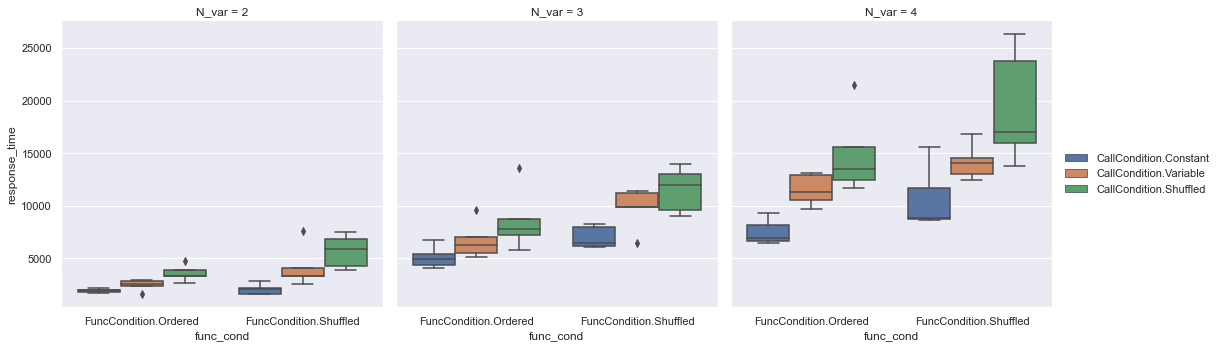

In [25]:
exp6 = FunctionArgsExperiment()

g = sns.FacetGrid(data=exp6.results(), col='N_var', height=5)
g.map(sns.boxplot, 
      'func_cond', 'response_time', 'call_cond', 
      palette=sns.color_palette(),
      order=list(map(str, exp6.FuncCondition)), hue_order=list(map(str, exp6.CallCondition))) \
    .add_legend()

Immediately, we can tell that there is much more between-condition variation (for a given $N_{var}$) than before. The ordering of mean response times corresponds to intuition: for functions, shuffled is harder than ordered. And for calls, shuffled > variable > constant. To quantify these discrepancies, we compare the % difference in median response time between conditions. 

In [30]:
print('===== Function condition: Shuffled percent slower than Ordered')
median_stats(exp6.results(), 'func_cond', 'FuncCondition.Shuffled', 'FuncCondition.Ordered')

===== Function condition: Shuffled percent slower than Ordered


,rt_frac,pvalue
N_var,,
2,1.275479,0.144127
3,1.516656,0.028460
4,1.241788,0.144127


These data show that the Shuffled condition (function arguments in different order than usage) induced a 20-50% slowdown. However, the smaller slowdowns were not statistically significant.

We can similarly look at the median response time fraction in the call condition, shuffled to variable:

In [31]:
print('===== Call condition: Shuffled percent slower than Variable')
median_stats(exp6.results(), 'call_cond', 'CallCondition.Shuffled', 'CallCondition.Variable')

===== Call condition: Shuffled percent slower than Variable


,rt_frac,pvalue
N_var,,
2,1.410945,0.025347
3,1.114824,1.000000
4,1.211404,0.179712


For $N_{var} \geq 3$, the difference is not significant.

## 2.3 Experiment 7: Function call alignment

The previous experiment demonstrated that for a simple computation-with-functions task, order of arguments had a meaningful impact on response times. To drill-down on this effect further, we can consider an extremely simple intervention. Consider these two programs:

Program 1 (Misaligned):

```python
def e(a, n, w, x):
    return x - n - a - w

e(4, 6, 6, 9)
```

Program 2 (Aligned):

```python
    e(4, 6, 6, 9)
def e(a, n, w, x):
    return x - n - a - w
```

Similar to how aligning digits is useful for long multiplication, we hypothetize that second program should be easier to trace because the index-based relationship between variables (in the function definition) and values (in the function call) is easier to see at a glance. 

To test this hypothesis, we randomly generate programs of the above forms for $N_{var} = 3 \ldots 6$, then measure the participant's response time in mentally tracing the value of the function call. For each $N_{var}$, we run 10 trials of the Aligned condition and 10 trials of the Misaligned condition. The distribution of response times is shown below:

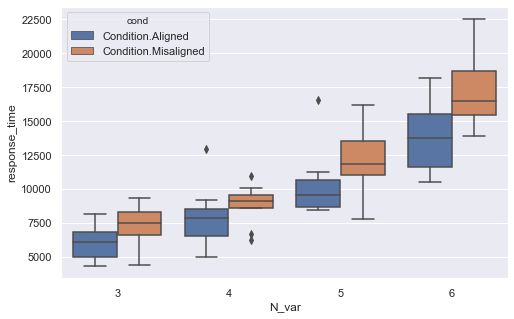

In [33]:
exp7 = FunctionAlignExperiment()
sns.boxplot(
    data=exp7.results(), x='N_var', y='response_time', hue='cond', hue_order=list(map(str, exp7.Condition)))

The misaligned condition appears to be generally slower, albeit with high variance. As before, I compare the ratio of medians in each condition, and compute the significance level.

In [34]:
median_stats(exp7.results(), 'cond', 'Condition.Misaligned', 'Condition.Aligned')

,rt_frac,pvalue
N_var,,
3,1.221894,0.179712
4,1.154726,0.025347
5,1.246136,0.025347
6,1.198770,0.179712


On average, the misaligned condition is 20% slower than the aligned condition. This result is statistically significant for $N_{var} = 4, 5$ but not $3, 6$. 

## 2.3 Summary of function call experiments

For equivalent programs, tracing function calls can induce siginificant amounts of cognitive load. The two main conclusions:

1. For two multi-stage arithmetic programs, tracing the version with functions is 2x slower than the version without functions.<br /><br />

2. For single-function programs, both the order of arguments at the function definition site influenced response time, 30% slower when randomized.<br /><br />

3. For a simple computation, aligning a function call with its definition was 15-20% faster than leaving them unaligned.

# 3. Call stack

When multiple functions call each other, the resulting call stack requires maintenance (or recomputation) of intermediates in the call frame, as well as a "return pointer" for the previous function. For example, consider these three equivalent programs:

Program 1, nameless form:

```python
(3 - 2) - ((4 - 1) + (3 - 6))
```

Program 2: variable form:

```python
x = 4 - 1
y = 3 - 6
z = x + y
w = 3 - 2
q = w - z
q
```

Program 3, function form:

```python
def a():
    return 4 - 1
def b():
    return 3 - 6
def c():
    return a() + b()
def d():
    return 3 - 2
def e():
    return d() - c()
e()
```

In each program, the tracer must maintain either the left or right side of a binary operation in working memory as an intermediate. For example, in program 3, the fact that `d() = 1` must be retained while computing `c()`. Alternatively, it can be computed later while remembering `c() = 0`. In program 2, bindings to be maintained have variable names, like remembering `x = 3`. In program 1, intermediates are nameless.

A key difference is knowing where to continue computation after an intermediate has been computed. 
* Program 2 implies a regular execution order (top to bottom). 
* For program 1, an execution order must be inferred from the parenthetical text structure. The next operation to compute can be determined by looking for the binary operation associated with the layer of parentheses outside the current intermediate.
* For program 3, the execution order is set by the program, but is less obvious than program 2. For example, when computing `a() = 4 - 1 = 5`, the tracer must remember to jump back to program `c()`, then back `e()` after computing `b()`.

Our hypothesis is that the additional information of maintaining backpointers introduces cognitive load that can interfere with working memory for intermediates. Programs with a deep or convoluted call stack should require more time to trace than programs with a clear execution order. The function form should be harder than the variable and nameless forms.

## 3.1 Experiment 8: Call stack tracing

To test the above hypothesis, we performed an experiment comparing response times in each condition described above. Specifically, for a given $N_{var}$, we randomly generate a arithmetic expression tree with $N_var$ binary operations (essentially randomly inserting parentheses). Then the arithmetic expression tree is converted into either a nameless form, variable form, or function form. Within the function form, we consider functions ordered both in a preorder traversal and randomly ordered.

For each $N_{var}$ and condition, we ran 10 trials and evaluated response time and accuracy. The response time distributions are shown below:

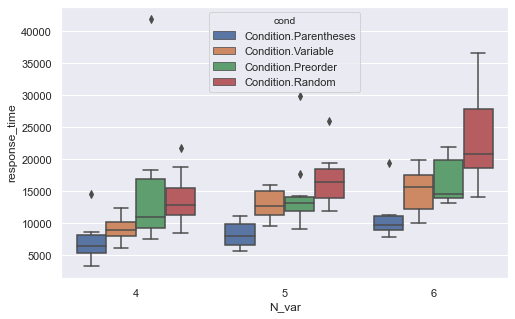

In [26]:
exp8 = FunctionDepthExperiment()
sns.boxplot(
    data=exp8.results(), x='N_var', y='response_time', hue='cond', hue_order=list(map(str, exp8.Condition)))

The results somewhat seem to match our hypothesis, although variance is high. Nameless/parentheses is clearly easier than the other conditions. Variable vs. preorder appear to be similar, and random is worse than all the other conditions. Double-checking the pvalues, we get signifiance (or close to it) in these cases:

In [46]:
print('==== Variable is % slower than Parentheses')
print(median_stats(exp8.results(), 'cond', 'Condition.Variable', 'Condition.Parentheses'))

print('\n\n==== Random is % slower than Variable')
print(median_stats(exp8.results(), 'cond', 'Condition.Random', 'Condition.Variable'))

==== Variable is % slower than Parentheses
        rt_frac    pvalue
N_var                    
4      1.378628  0.154729
5      1.599950  0.017706
6      1.611679  0.017706


==== Random is % slower than Variable
        rt_frac    pvalue
N_var                    
4      1.439966  0.154729
5      1.290797  0.154729
6      1.332419  0.154729


Variable (and all other conditions) are significantly slower than Parentheses. Random is slower than variable, but only with $p = 0.15$. 

**Conclusions**

1. For $N_{var} = 4 \ldots 6$, a nameless arithmetic expression is faster to evaluate by ~50% than one separated into variables or functions.<br /><br />

2. Randomly ordered functions are traced ~30% slower than equivalent variable and preordered function programs.